### LUNG CANCER DATASET 

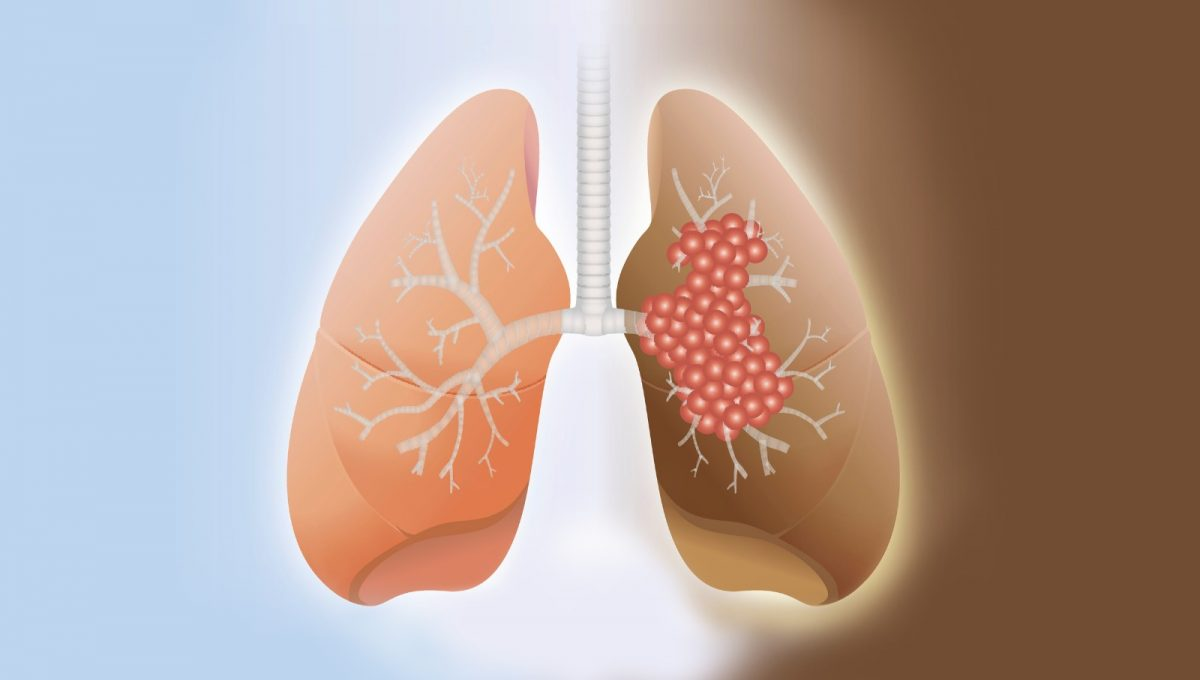

Lung cancer is a malignant tumor that develops from the glands and mucous membrane of the lung tissue and bronchi.
Every year, about 2.2 million cases of lung cancer are diagnosed in the world, or 11.4% of all detected malignancies.
In world statistics, lung cancer ranks second after breast cancer.


The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .

In this dataset, I will try to use models to predict who is more likely to develop lung cancer. To find out what are the risk factors that can be changed in advance and prevent the development of lung cancer. 

Observation: 
1. Gender: M(male), F(female) 
2. Age: Age of the patient 
3. Smoking: YES=2 , NO=1. 
4. Yellow fingers: YES=2 , NO=1. 
5. Anxiety: YES=2 , NO=1. 
6. Peer_pressure: YES=2 , NO=1. 
7. Chronic Disease: YES=2 , NO=1. 
8. Fatigue: YES=2 , NO=1. 
9. Allergy: YES=2 , NO=1. 
10. Wheezing: YES=2 , NO=1. 
11. Alcohol: YES=2 , NO=1. 
12. Coughing: YES=2 , NO=1. 
13. Shortness of Breath: YES=2 , NO=1. 
14. Swallowing Difficulty: YES=2 , NO=1. 
15. Chest pain: YES=2 , NO=1. 
16. Lung Cancer: YES , NO. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

#libraries for Spliting data set
from sklearn.model_selection import train_test_split


#libraries for balancing the dataset
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

#libraries for Feature magnitude
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for ML models: Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


#libraries for Matrixes for evaluating models
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

C:\Users\User\anaconda3\envs\KV-DW-JL-5\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data_cancer = pd.read_csv('../survey lung cancer.csv')
data_cancer   #yes 2, no 1

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
304         YES  
305         YES  
306         YES  
307         YES  
308         YES  

[309 rows x 16 columns]

In [3]:
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
data_cancer.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
data_cancer.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.497588   
min           1.000000    1.000000    1.000000    1.000000           1.000000   
25%           1.000000    1.000000    1.000000    1.000000           1.000000   
50%           2.000000    2.000000    2.000000    2.000000           2.000000   
75%           2.000000    2.000000    2.000000    2.000000           2.000000   
max           2.000000    2.000000    2.000000    2.000000           2.000000   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
count  309.000000           309.000000             309.000000  309.000000  
mean     1.579288             1.640777               1.469256    1.556634  
std      0.494474             0.480551               0.499863    0.497588  
min      1.000000             1.000000               1.000000    1.000000  
25%      1.000000             1.000000               1.000000    1.000000  
50%      2.000000             2.000000               1.000000    2.000000  
75%      2.000000             2.000000               2.000000    2.000000  
max      2.000000             2.000000               2.000000    2.000000

### Data Visualization

In [6]:
print ('Total Healthy Patients : {} '.format(data_cancer.LUNG_CANCER.value_counts()['NO']))
print ('Total Suspected Patients : {} '.format(data_cancer.LUNG_CANCER.value_counts()['YES']))

Total Healthy Patients : 39 
Total Suspected Patients : 270 


### target LUNG_CANCER

<AxesSubplot:ylabel='None'>

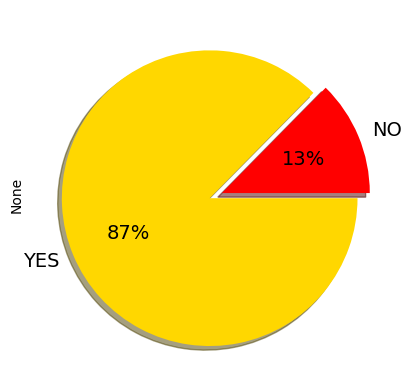

In [7]:
data_cancer.groupby('LUNG_CANCER').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.070],shadow=True,
                                           colors=['red', 'gold',])

In this dataset, 87% of the total population has lung cancer. We see that the dataset is unbalanced. 

### GENDER

<AxesSubplot:ylabel='None'>

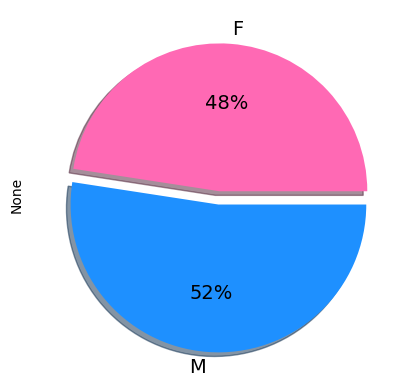

In [8]:
data_cancer.groupby('GENDER').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.070],shadow=True,
                                           colors=['hotpink', 'dodgerblue',])

    there are more men than women in this dataset. 

Text(0.5, 0.98, 'Distribution of lung cancer by gender')

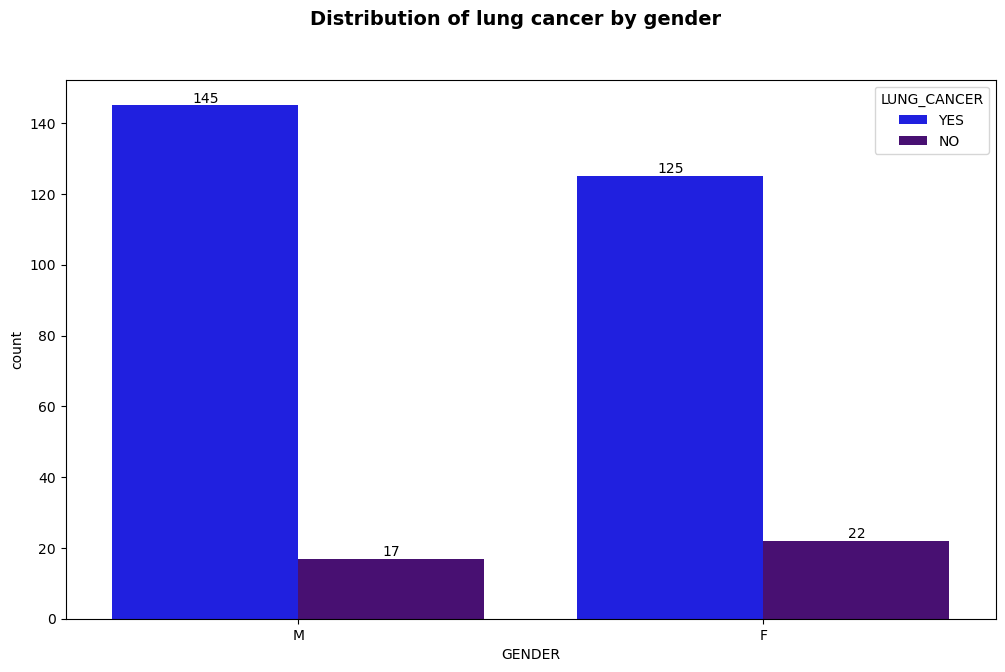

In [9]:
plt.figure(figsize = (12, 7))
ax = sns.countplot(x =data_cancer['GENDER'],
                   hue = data_cancer['LUNG_CANCER'], 
                   hue_order = ['YES', 'NO'],
                   palette = ['blue', 'indigo'])
ax.bar_label(container = ax.containers[0])
ax.bar_label(container = ax.containers[1])
plt.suptitle('Distribution of lung cancer by gender', fontsize = '14', fontweight ='heavy')


    Lung cancer occurs regardless of gender 

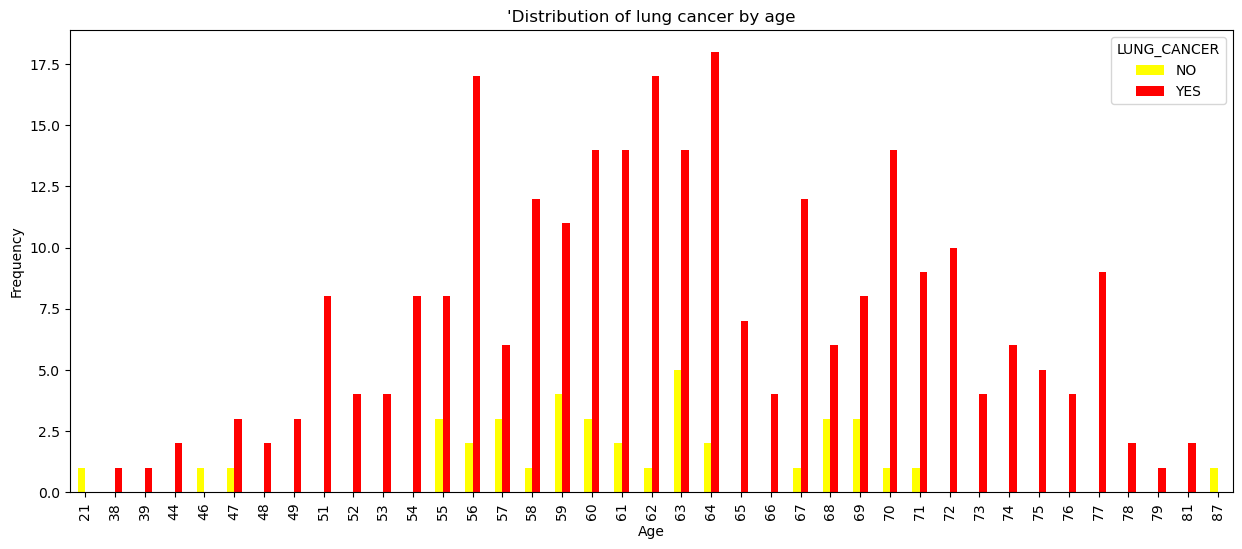

In [10]:
pd.crosstab(data_cancer.AGE, data_cancer.LUNG_CANCER).plot(kind="bar",figsize=(15,6), color = ['yellow', 'red'] )
plt.title("'Distribution of lung cancer by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    Lung cancer from age 38 to age 81

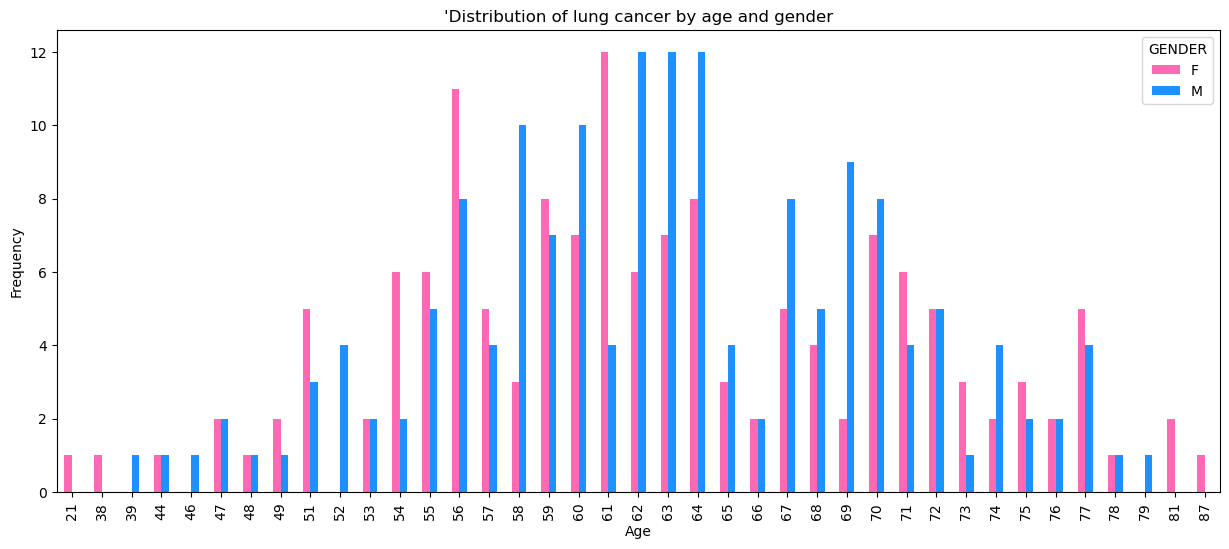

In [11]:
pd.crosstab(data_cancer.AGE, data_cancer.GENDER).plot(kind="bar",figsize=(15,6), color = ['hotpink', 'dodgerblue'])
plt.title("'Distribution of lung cancer by age and gender")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    In this dataset, the youngest age for females is 38 years old and for males 39 years old. 
    The oldest age for women is 81 years, for men 79 years. 
    Women are more likely to get lung cancer before age 61, and men from age 62. 

### SMOKING

<AxesSubplot:ylabel='None'>

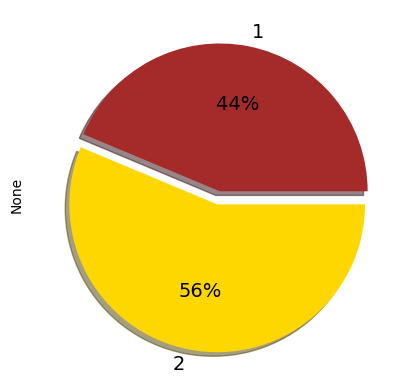

In [12]:
data_cancer.groupby('SMOKING').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.070],shadow=True,
                                           colors=['brown', 'gold',])  #explode = указывает на расстояние между кругами,shadow = показывает обьем. тень рисунка  

    56% of patients have bad habits like smoking

Text(0.5, 0.98, 'Distribution of lung cancer according to smoking')

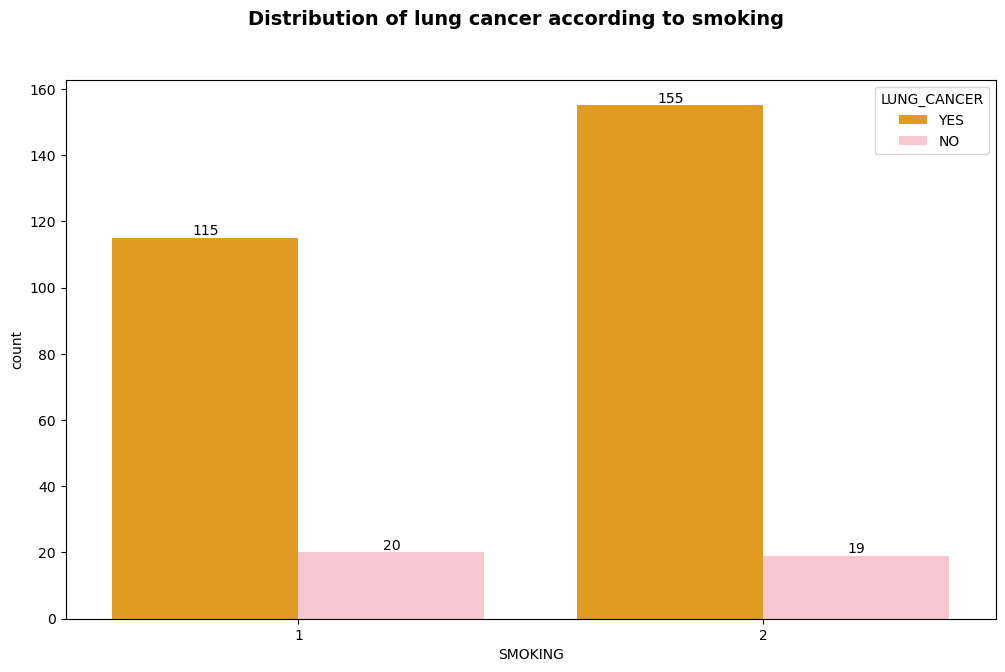

In [13]:
plt.figure(figsize = (12, 7))
ax = sns.countplot(x =data_cancer['SMOKING'],
                   hue = data_cancer['LUNG_CANCER'], 
                   hue_order = ['YES', 'NO'],
                   palette = ['orange', 'pink'])
ax.bar_label(container = ax.containers[0])
ax.bar_label(container = ax.containers[1])
plt.suptitle('Distribution of lung cancer according to smoking', fontsize = '14', fontweight ='heavy')

    whether you smoke cigarettes or not, everyone gets lung cancer.

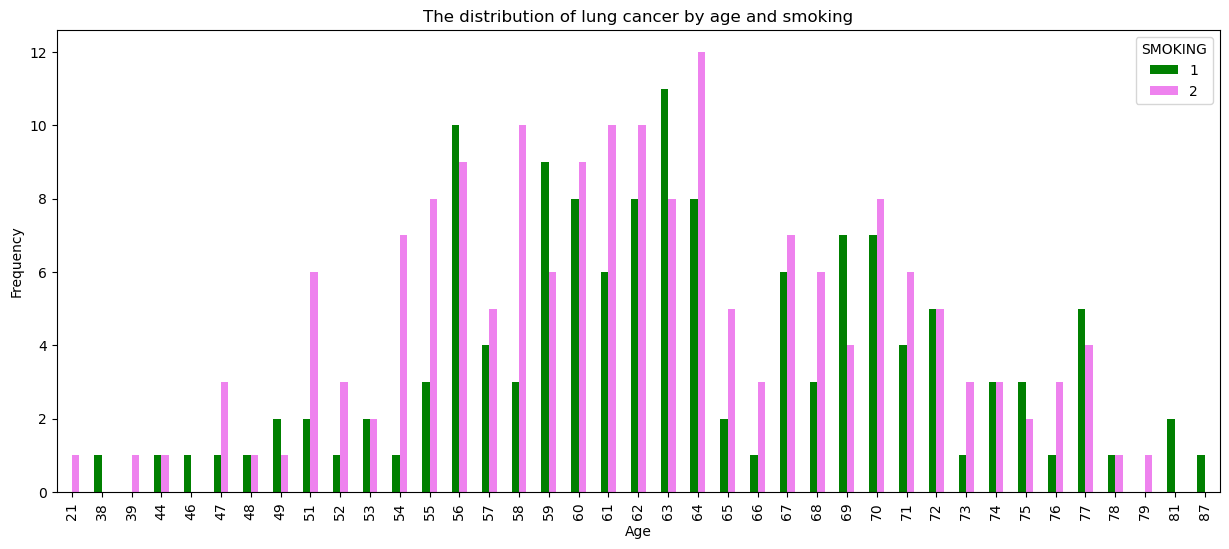

In [14]:
pd.crosstab(data_cancer.AGE, data_cancer.SMOKING).plot(kind="bar",figsize=(15,6), color = ['green', 'violet'])
plt.title("The distribution of lung cancer by age and smoking")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    the distribution of smoking by age is almost identical 

### GENDER Vs SMOKING & ALCOHOL CONSUMING

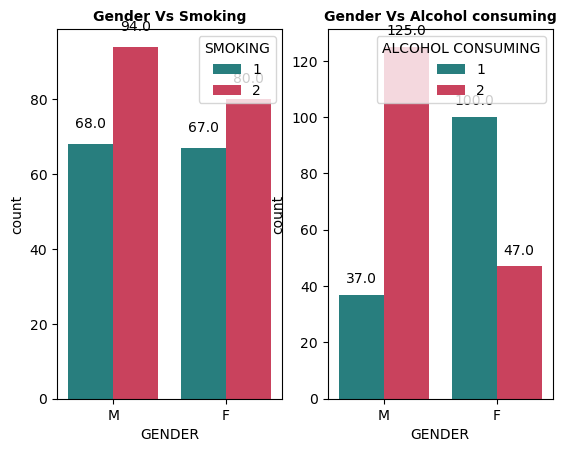

In [15]:
colors = ['teal', 'crimson']
order = data_cancer['GENDER'].value_counts().index

plt.subplot(1, 2, 1)
plt.title('Gender Vs Smoking', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'GENDER', hue = 'SMOKING', data = data_cancer, palette = colors, order = order, alpha = 0.9)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )

plt.subplot(1, 2, 2)
plt.title('Gender Vs Alcohol consuming', fontweight='heavy', 
             fontsize='10', fontfamily='sans-serif')
ax = sns.countplot(x = 'GENDER', hue = 'ALCOHOL CONSUMING', data = data_cancer, palette = colors, order = order, alpha = 0.9)

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
            )
plt.show()


    1.Men and women smoke almost equally.
    2.More men than women drink alcohol.

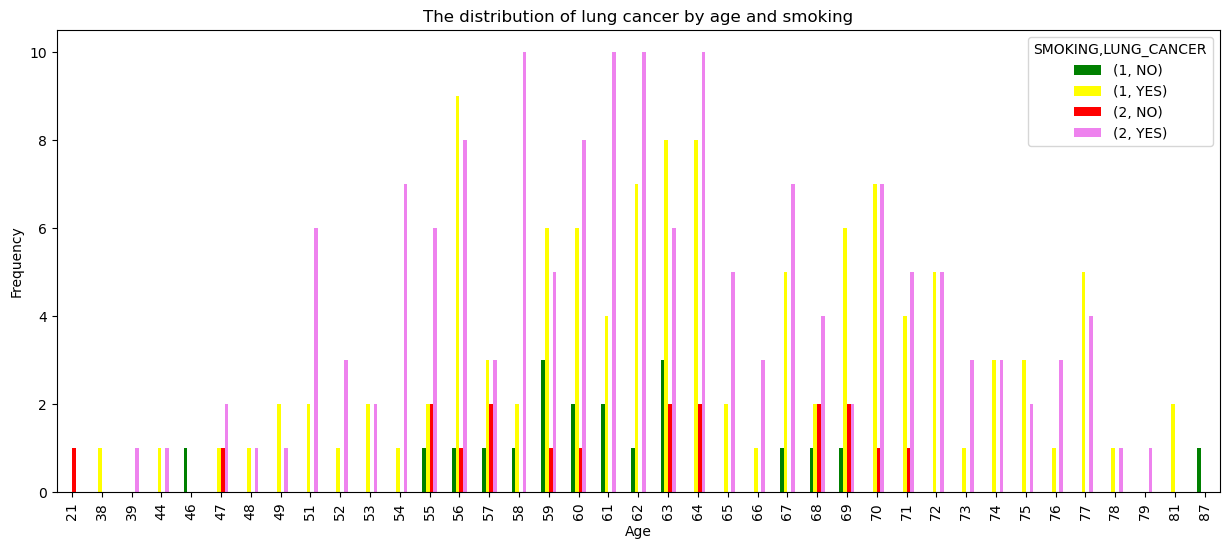

In [16]:
pd.crosstab(data_cancer.AGE, [data_cancer.SMOKING, data_cancer.LUNG_CANCER]).plot(kind="bar",figsize=(15,6), color = ['green', 'yellow', 'red', 'violet'])
plt.title("The distribution of lung cancer by age and smoking")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    Сonclusions on this schedule :
    1.  In this dataset, smokers and lung cancer patients are the majority, but also occur in non-smokers. 
    2. at 38 years and 81 years old women do not smoke but have lung cancer. 
    3. more often at the age of 51 years and above. 

<AxesSubplot:ylabel='None'>

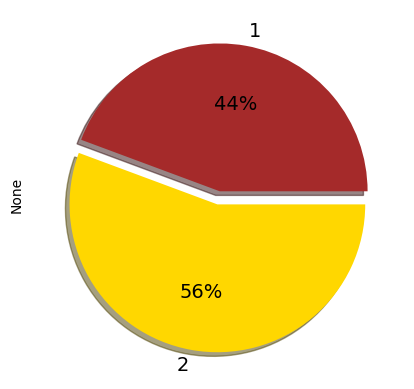

In [17]:
data_cancer.groupby('ALCOHOL CONSUMING').size().plot(kind='pie',  textprops={'fontsize': 14}, autopct='%1.0f%%',
                                            explode=[0.02, 0.070],shadow=True,
                                           colors=['brown', 'gold'])

    Аlcohol use by 56%

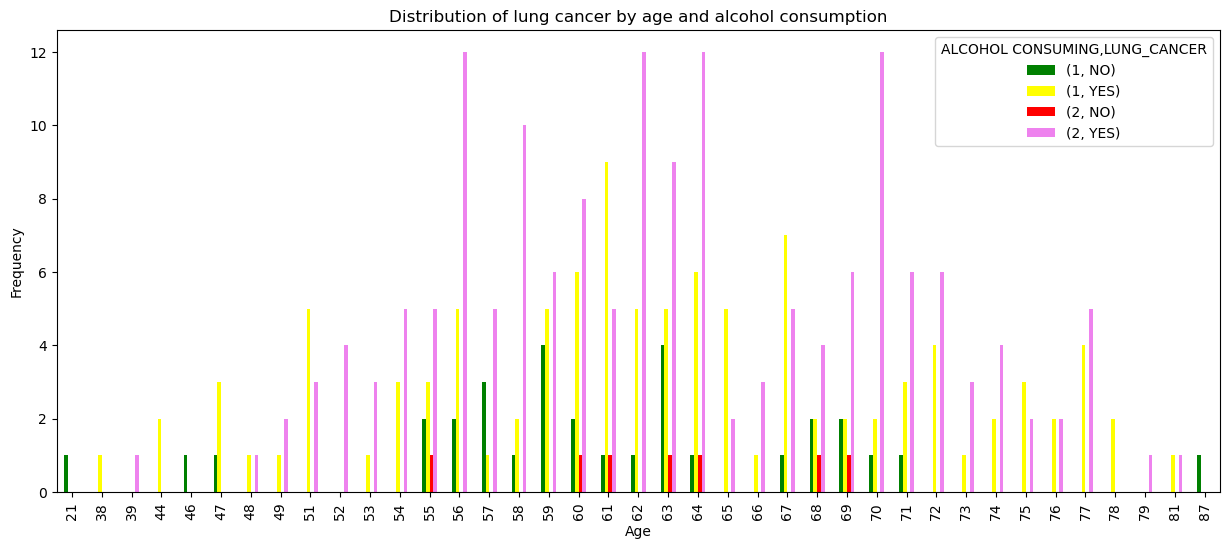

In [18]:
pd.crosstab(data_cancer.AGE, [data_cancer['ALCOHOL CONSUMING'], data_cancer.LUNG_CANCER]).plot(kind="bar",figsize=(15,6), color = ['green', 'yellow', 'red', 'violet'])
plt.title("Distribution of lung cancer by age and alcohol consumption")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

    use alcohol and have lung cancer between the ages of 39 and 81. 

In [19]:
data_cancer.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

### Distribution of gender by chronic diseases
      variables 'YELLOW_FINGERS', 'CHRONIC DISEASE', 'ALLERGY ', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', I've grouped them as chronic diseases to make it easier to navigate. 

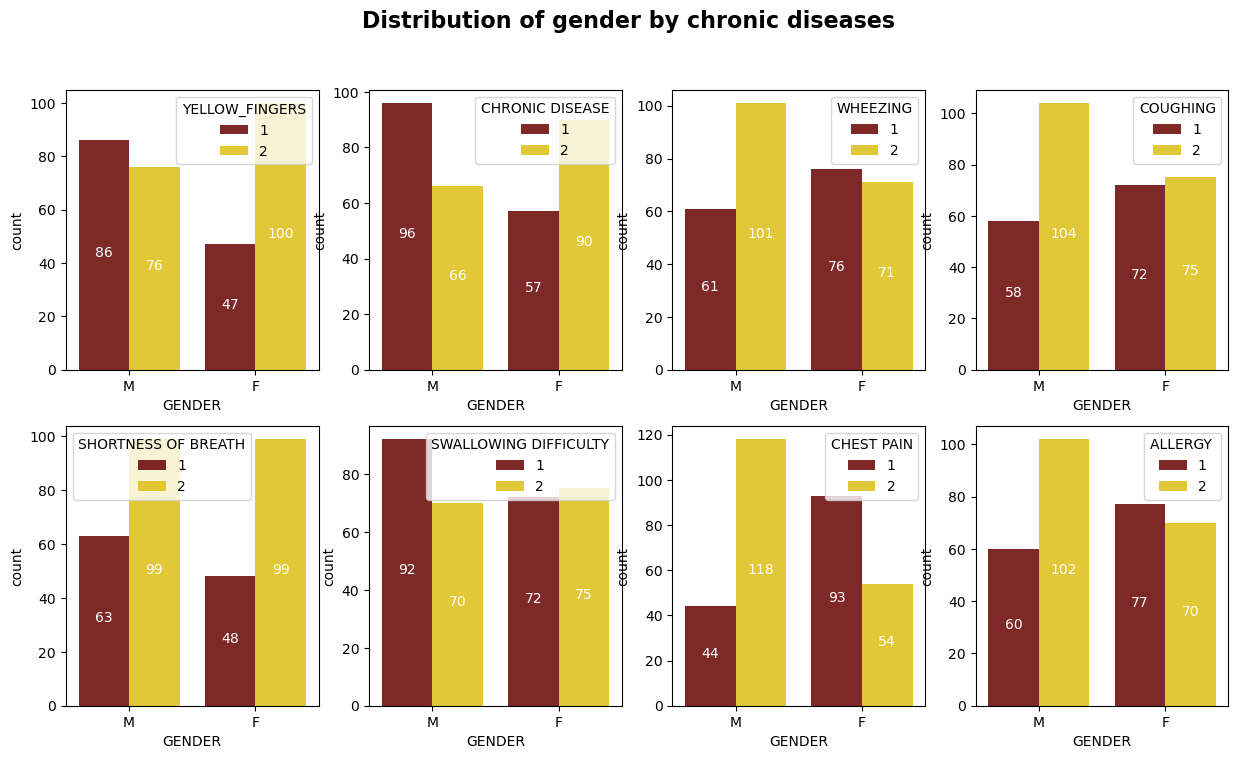

In [20]:
colors = ['maroon', 'gold']
order = data_cancer['GENDER'].value_counts().index

fig, axs = plt.subplots(2, 4, figsize=(15, 8)) #2 - ряды, 4- сколько графиков в каждом ряду
plt.suptitle('Distribution of gender by chronic diseases', color = 'black', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')
sns.countplot(x = 'GENDER', hue = 'YELLOW_FINGERS', data = data_cancer, palette = colors, ax=axs[0,0], order = order, alpha = 0.9)
for container in axs[0,0].containers:
    axs[0,0].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)


sns.countplot(x = 'GENDER', hue = 'CHRONIC DISEASE', data = data_cancer, palette = colors, ax=axs[0,1], order = order, alpha = 0.9)
for container in axs[0,1].containers:
    axs[0,1].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'GENDER', hue = 'WHEEZING', data = data_cancer, palette = colors, ax=axs[0,2], order = order, alpha = 0.9)
for container in axs[0,2].containers:
    axs[0,2].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'GENDER', hue = 'COUGHING', data = data_cancer, palette = colors, ax=axs[0,3], order = order, alpha = 0.9)
for container in axs[0,3].containers:
    axs[0,3].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'GENDER', hue = 'SHORTNESS OF BREATH', data = data_cancer, palette = colors, ax=axs[1,0], order = order, alpha = 0.9)
for container in axs[1,0].containers:
    axs[1,0].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'GENDER', hue = 'SWALLOWING DIFFICULTY', data = data_cancer, palette = colors, ax=axs[1,1], order = order, alpha = 0.9)
for container in axs[1,1].containers:
    axs[1,1].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'GENDER', hue = 'CHEST PAIN', data = data_cancer, palette = colors, ax=axs[1,2], order = order, alpha = 0.9)
for container in axs[1,2].containers:
    axs[1,2].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'GENDER', hue = 'ALLERGY ', data = data_cancer, palette = colors, ax=axs[1,3], order = order, alpha = 0.9)
for container in axs[1,3].containers:
    axs[1,3].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
plt.show()

    1. Women often have yellow fingers
    2. Chronic diseases are more common in women than in men.
    3. Wheezing and coughing are common in men.
    4. Shortness of breath occurs in both men and women.
    5. Difficulty swallowing is the same in both women and men.
    6. Chest pain, allergies often in men

### Distribution of gender according to mental health
             variables "ANXIETY", "PEER PRESSURE", "FATIGUE" , categorized in the mental health group 

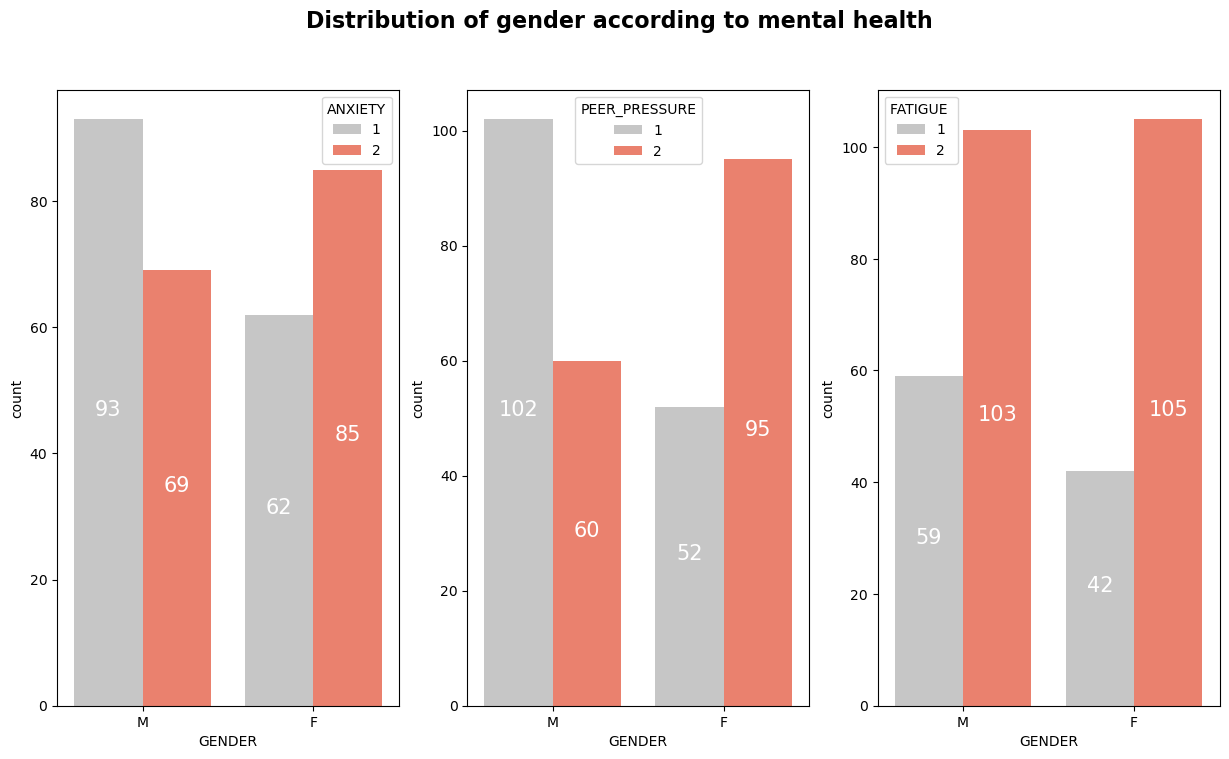

In [21]:
colors = ['silver', 'tomato']
order = data_cancer['GENDER'].value_counts().index

fig, axs = plt.subplots(1, 3, figsize=(15, 8)) 
plt.suptitle('Distribution of gender according to mental health', color = 'black', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')
sns.countplot(x = 'GENDER', hue = 'ANXIETY', data = data_cancer, palette = colors, ax=axs[0], order = order, alpha = 0.9)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=2,size=15,color="white",rotation=0)


sns.countplot(x = 'GENDER', hue = 'PEER_PRESSURE', data = data_cancer, palette = colors, ax=axs[1], order = order, alpha = 0.9)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=2,size=15,color="white",rotation=0)
    
sns.countplot(x = 'GENDER', hue = 'FATIGUE ', data = data_cancer, palette = colors, ax=axs[2], order = order, alpha = 0.9)
for container in axs[2].containers:
    axs[2].bar_label(container,label_type="center",padding=2,size=15,color="white",rotation=0)
plt.show()

    1. Constant anxiety is felt by women
    2. Women feel more pressure from others than men do
    3. Both men and women feel fatigue 

### Distribution of chronic diseases by target

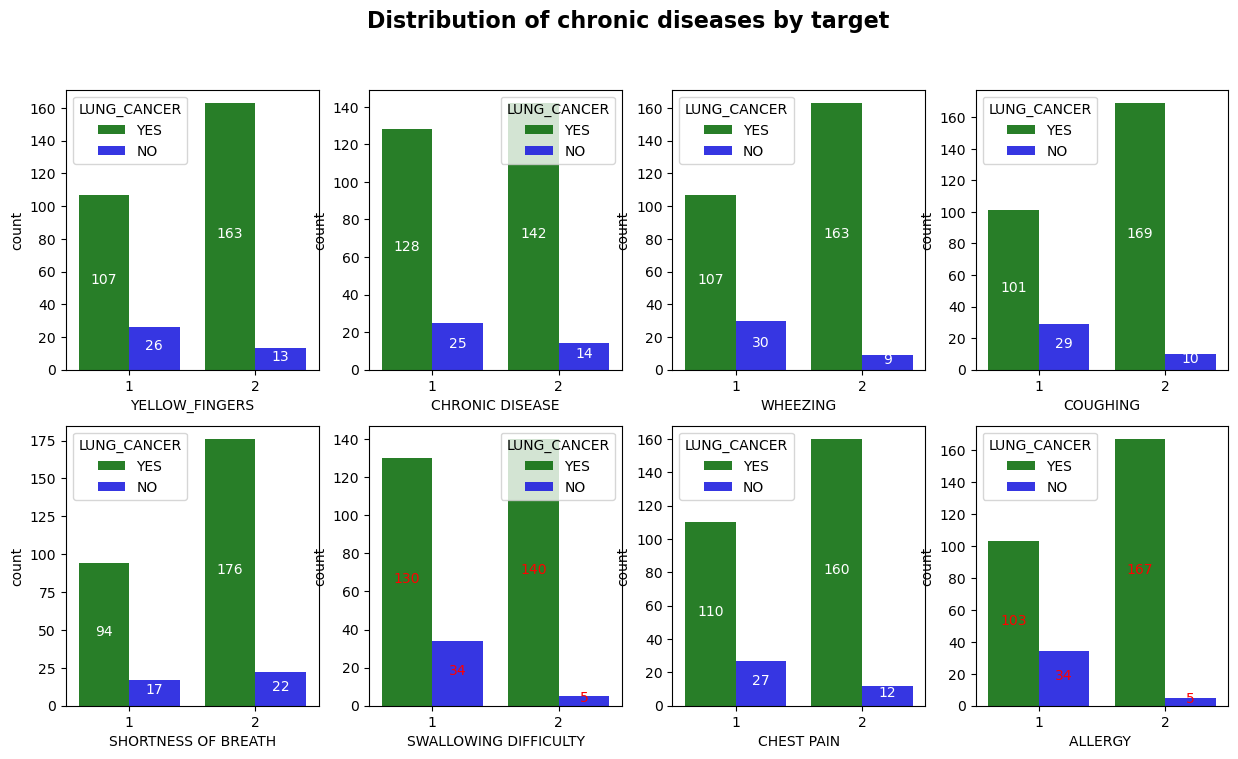

In [22]:
colors = ['green', 'blue']


fig, axs = plt.subplots(2, 4, figsize=(15, 8)) 
plt.suptitle('Distribution of chronic diseases by target', color = 'black', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')
sns.countplot(x = 'YELLOW_FINGERS', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[0,0], alpha = 0.9)
for container in axs[0,0].containers:
    axs[0,0].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)


sns.countplot(x = 'CHRONIC DISEASE', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[0,1],  alpha = 0.9)
for container in axs[0,1].containers:
    axs[0,1].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'WHEEZING', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[0,2], alpha = 0.9)
for container in axs[0,2].containers:
    axs[0,2].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'COUGHING', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[0,3], alpha = 0.9)
for container in axs[0,3].containers:
    axs[0,3].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'SHORTNESS OF BREATH', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[1,0],  alpha = 0.9)
for container in axs[1,0].containers:
    axs[1,0].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'SWALLOWING DIFFICULTY', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[1,1], alpha = 0.9)
for container in axs[1,1].containers:
    axs[1,1].bar_label(container,label_type="center",padding=2,size=10,color="red",rotation=0)
    
sns.countplot(x = 'CHEST PAIN', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[1,2],  alpha = 0.9)
for container in axs[1,2].containers:
    axs[1,2].bar_label(container,label_type="center",padding=2,size=10,color="white",rotation=0)
    
sns.countplot(x = 'ALLERGY ', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[1,3],  alpha = 0.9)
for container in axs[1,3].containers:
    axs[1,3].bar_label(container,label_type="center",padding=2,size=10,color="red",rotation=0)
    
plt.show()

    On the graphs we see that lung cancer occurs more often in people with chronic diseases

### Distribution of mental health by target

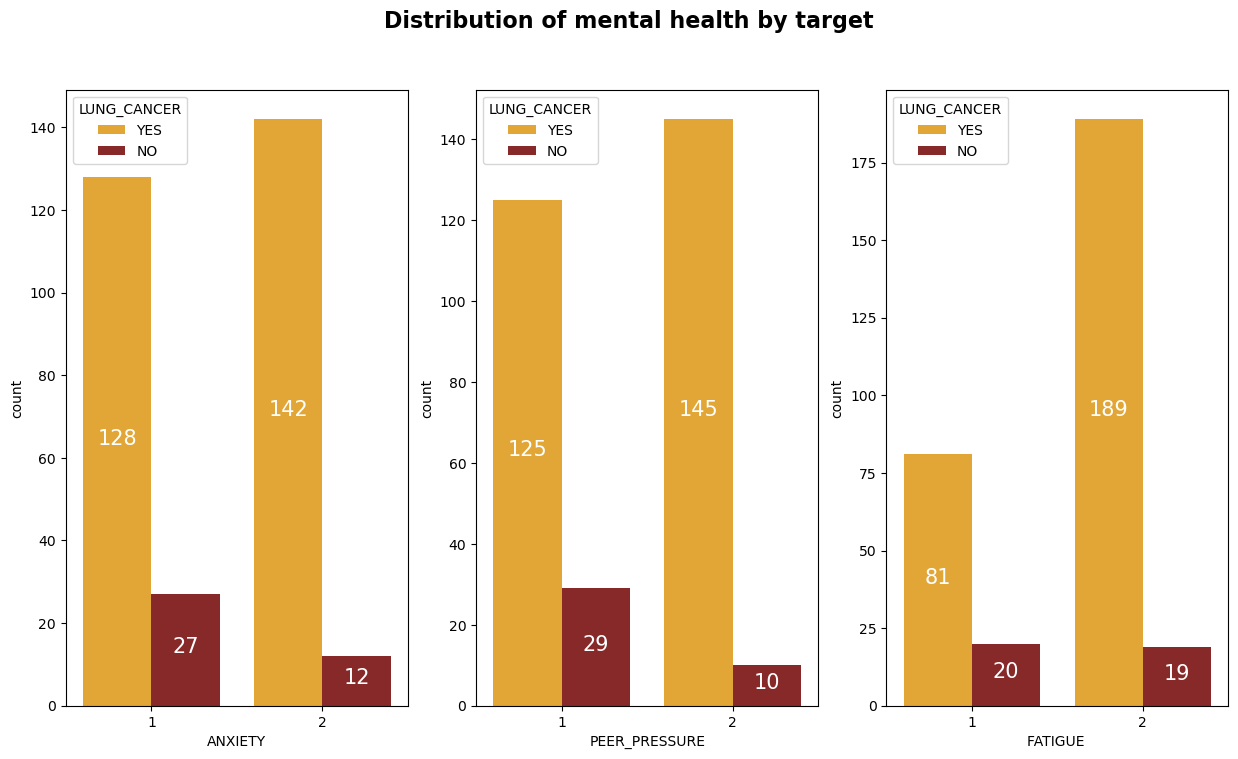

In [23]:
colors = ['orange', 'darkred']

fig, axs = plt.subplots(1, 3, figsize=(15, 8)) 
plt.suptitle('Distribution of mental health by target', color = 'black', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif')
sns.countplot(x = 'ANXIETY', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[0], alpha = 0.9)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=2,size=15,color="white",rotation=0)


sns.countplot(x = 'PEER_PRESSURE', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[1], alpha = 0.9)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=2,size=15,color="white",rotation=0)
    
sns.countplot(x = 'FATIGUE ', hue = 'LUNG_CANCER', data = data_cancer, palette = colors, ax=axs[2], alpha = 0.9)
for container in axs[2].containers:
    axs[2].bar_label(container,label_type="center",padding=2,size=15,color="white",rotation=0)
plt.show()

    Lung cancer affects people who constantly experience anxiety, pressure from outside and fatigue. 

In [24]:
data_cancer.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

### replacing values
    replace the data type with int 

In [25]:
data_cancer.GENDER.replace({"M":1,"F":0}, inplace=True)
data_cancer.LUNG_CANCER.replace({"YES":1,"NO":0}, inplace=True)

In [26]:
data_cancer

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

     LUNG_CANCER  
0              1  
1              1  
2              0  
3              0  
4              0  
..           ...  
304            1  
305            1  
306            1  
307            1  
308            1  

[309 rows x 16 columns]

In [27]:
data_cancer.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

### Correlation Heatmap

In [28]:
correlation = data_cancer.corr()
correlation

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.021306  0.036277       -0.212959 -0.152127   
AGE                    0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING                0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS        -0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY               -0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE         -0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE               -0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.454268  0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.133303  0.169950 -0.129471       -0.012640 -0.225644   
SHORTNESS OF BREATH   -0.064911 -0.017513  0.061264       -0.105944 -0.144077   
SWALLOWING DIFFICULTY -0.078161 -0.001270  0.030718        0.345904  0.489403   
CHEST PAIN             0.362958 -0.018104  0.120117       -0.104829 -0.113634   
LUNG_CANCER            0.067254  0.089465  0.058179        0.181339  0.144947   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                     -0.275564        -0.204606 -0.083560  0.154251   
AGE                         0.018685        -0.012642  0.012614  0.027990   
SMOKING                    -0.042822        -0.141522 -0.029575  0.001913   
YELLOW_FINGERS              0.323083         0.041122 -0.118058 -0.144300   
ANXIETY                     0.216841        -0.009678 -0.188538 -0.165750   
PEER_PRESSURE               1.000000         0.048515  0.078148 -0.081800   
CHRONIC DISEASE             0.048515         1.000000 -0.110529  0.106386   
FATIGUE                     0.078148        -0.110529  1.000000  0.003056   
ALLERGY                    -0.081800         0.106386  0.003056  1.000000   
WHEEZING                   -0.068771        -0.049967  0.141937  0.173867   
ALCOHOL CONSUMING          -0.159973         0.002150 -0.191377  0.344339   
COUGHING                   -0.089019        -0.175287  0.146856  0.189524   
SHORTNESS OF BREATH        -0.220175        -0.026459  0.441745 -0.030056   
SWALLOWING DIFFICULTY       0.366590         0.075176 -0.132790 -0.061508   
CHEST PAIN                 -0.094828        -0.036938 -0.010832  0.239433   
LUNG_CANCER                 0.186388         0.110891  0.150673  0.327766   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.141207           0.454268  0.133303   
AGE                    0.055011           0.058985  0.169950   
SMOKING               -0.129426          -0.050623 -0.129471   
YELLOW_FINGERS        -0.078515          -0.289025 -0.012640   
ANXIETY               -0.191807          -0.165750 -0.225644   
PEER_PRESSURE         -0.068771          -0.159973 -0.089019   
CHRONIC DISEASE       -0.049967           0.002150 -0.175287   
FATIGUE                0.141937          -0.191377  0.146856   
ALLERGY                0.173867           0.344339  0.189524   
WHEEZING               1.000000           0.265659  0.374265   
ALCOHOL CONSUMING      0.265659           1.000000  0.202720   
COUGHING               0.374265           0.202720  1.000000   
SHORTNESS OF BREATH    0.037834          -0.179416  0.277385   
SWALLOWING DIFFICULTY  0.069027          -0.009294 -0.157586   
CHEST PAIN             0.147640           0.331226  0.083958   
LUNG_CANCER            0.249300           0.288533  0.248570   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
GENDER                           -0.064911              -0.078161    0.362958   
AGE                              -0.017513              -0.001270   -0.018104   
SMOKI

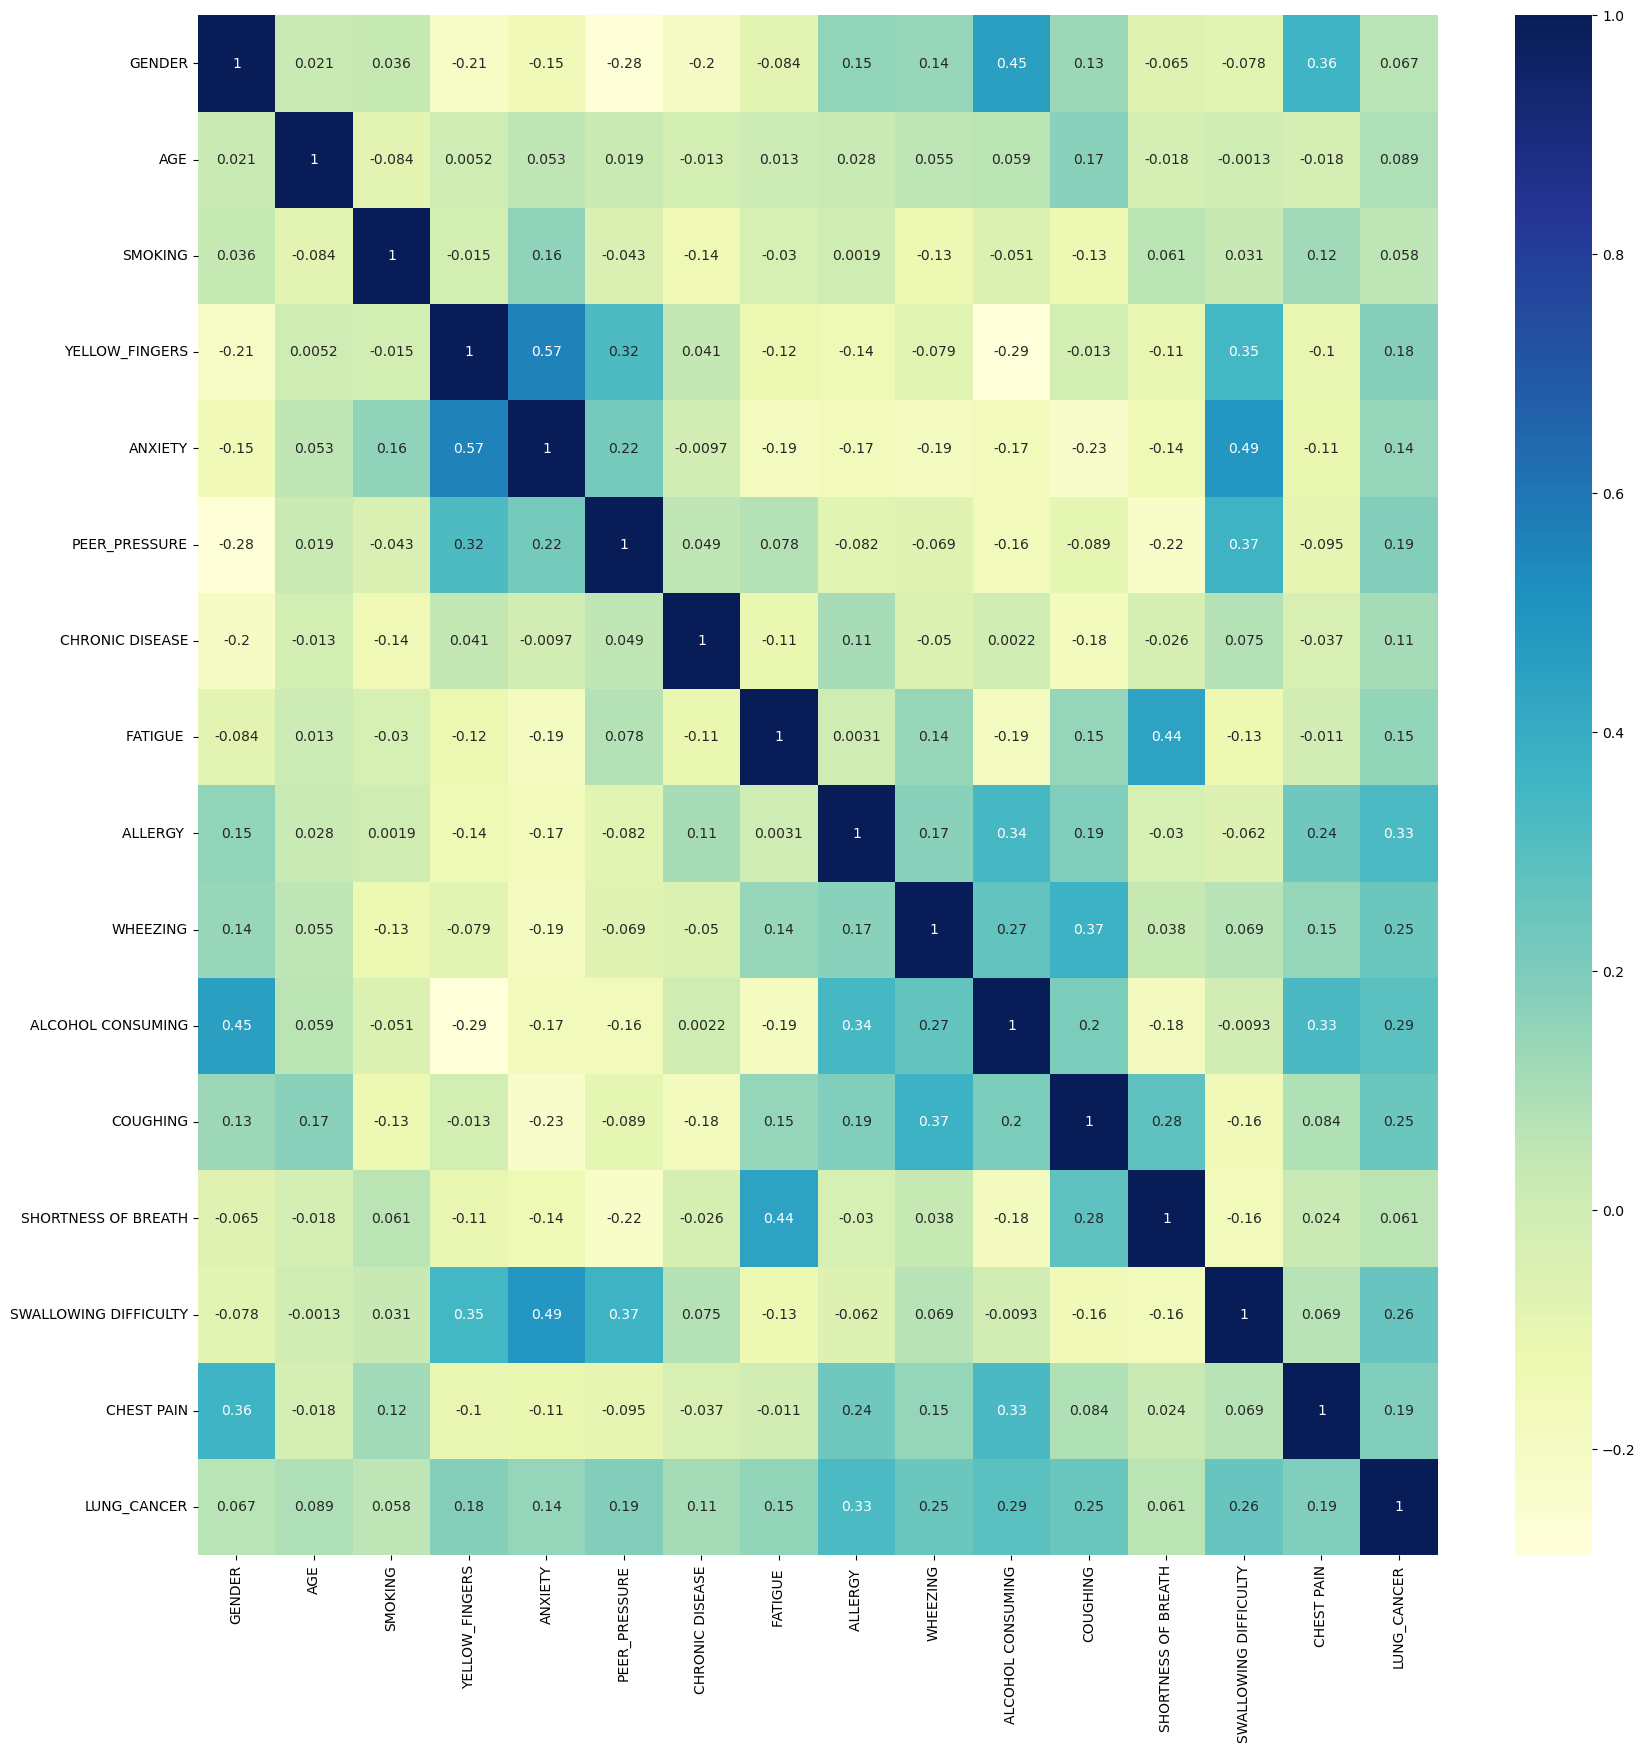

In [29]:
plt.subplots(figsize=(20,20))
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

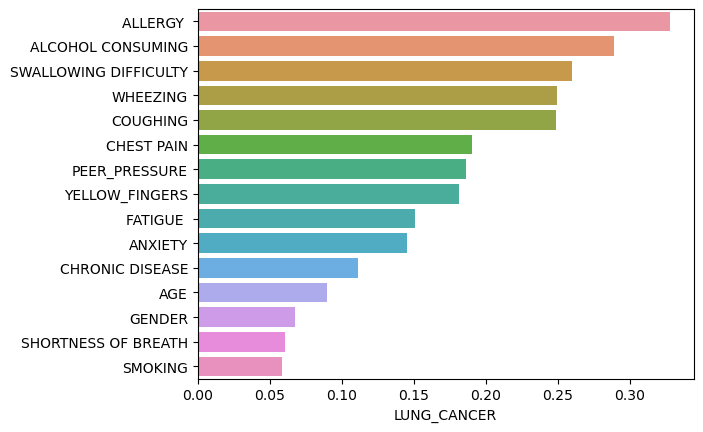

In [30]:
corr_with_target = correlation['LUNG_CANCER'].sort_values(ascending=False)[1:]
sns.barplot(y = corr_with_target.index, x = corr_with_target)
plt.xticks()
plt.show()

    ALLERGY 0.33 shows a high correlation with the target, while SMOKING shows a low one.

array([[<AxesSubplot:title={'center':'GENDER'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SMOKING'}>,
        <AxesSubplot:title={'center':'YELLOW_FINGERS'}>],
       [<AxesSubplot:title={'center':'ANXIETY'}>,
        <AxesSubplot:title={'center':'PEER_PRESSURE'}>,
        <AxesSubplot:title={'center':'CHRONIC DISEASE'}>,
        <AxesSubplot:title={'center':'FATIGUE '}>],
       [<AxesSubplot:title={'center':'ALLERGY '}>,
        <AxesSubplot:title={'center':'WHEEZING'}>,
        <AxesSubplot:title={'center':'ALCOHOL CONSUMING'}>,
        <AxesSubplot:title={'center':'COUGHING'}>],
       [<AxesSubplot:title={'center':'SHORTNESS OF BREATH'}>,
        <AxesSubplot:title={'center':'SWALLOWING DIFFICULTY'}>,
        <AxesSubplot:title={'center':'CHEST PAIN'}>,
        <AxesSubplot:title={'center':'LUNG_CANCER'}>]], dtype=object)

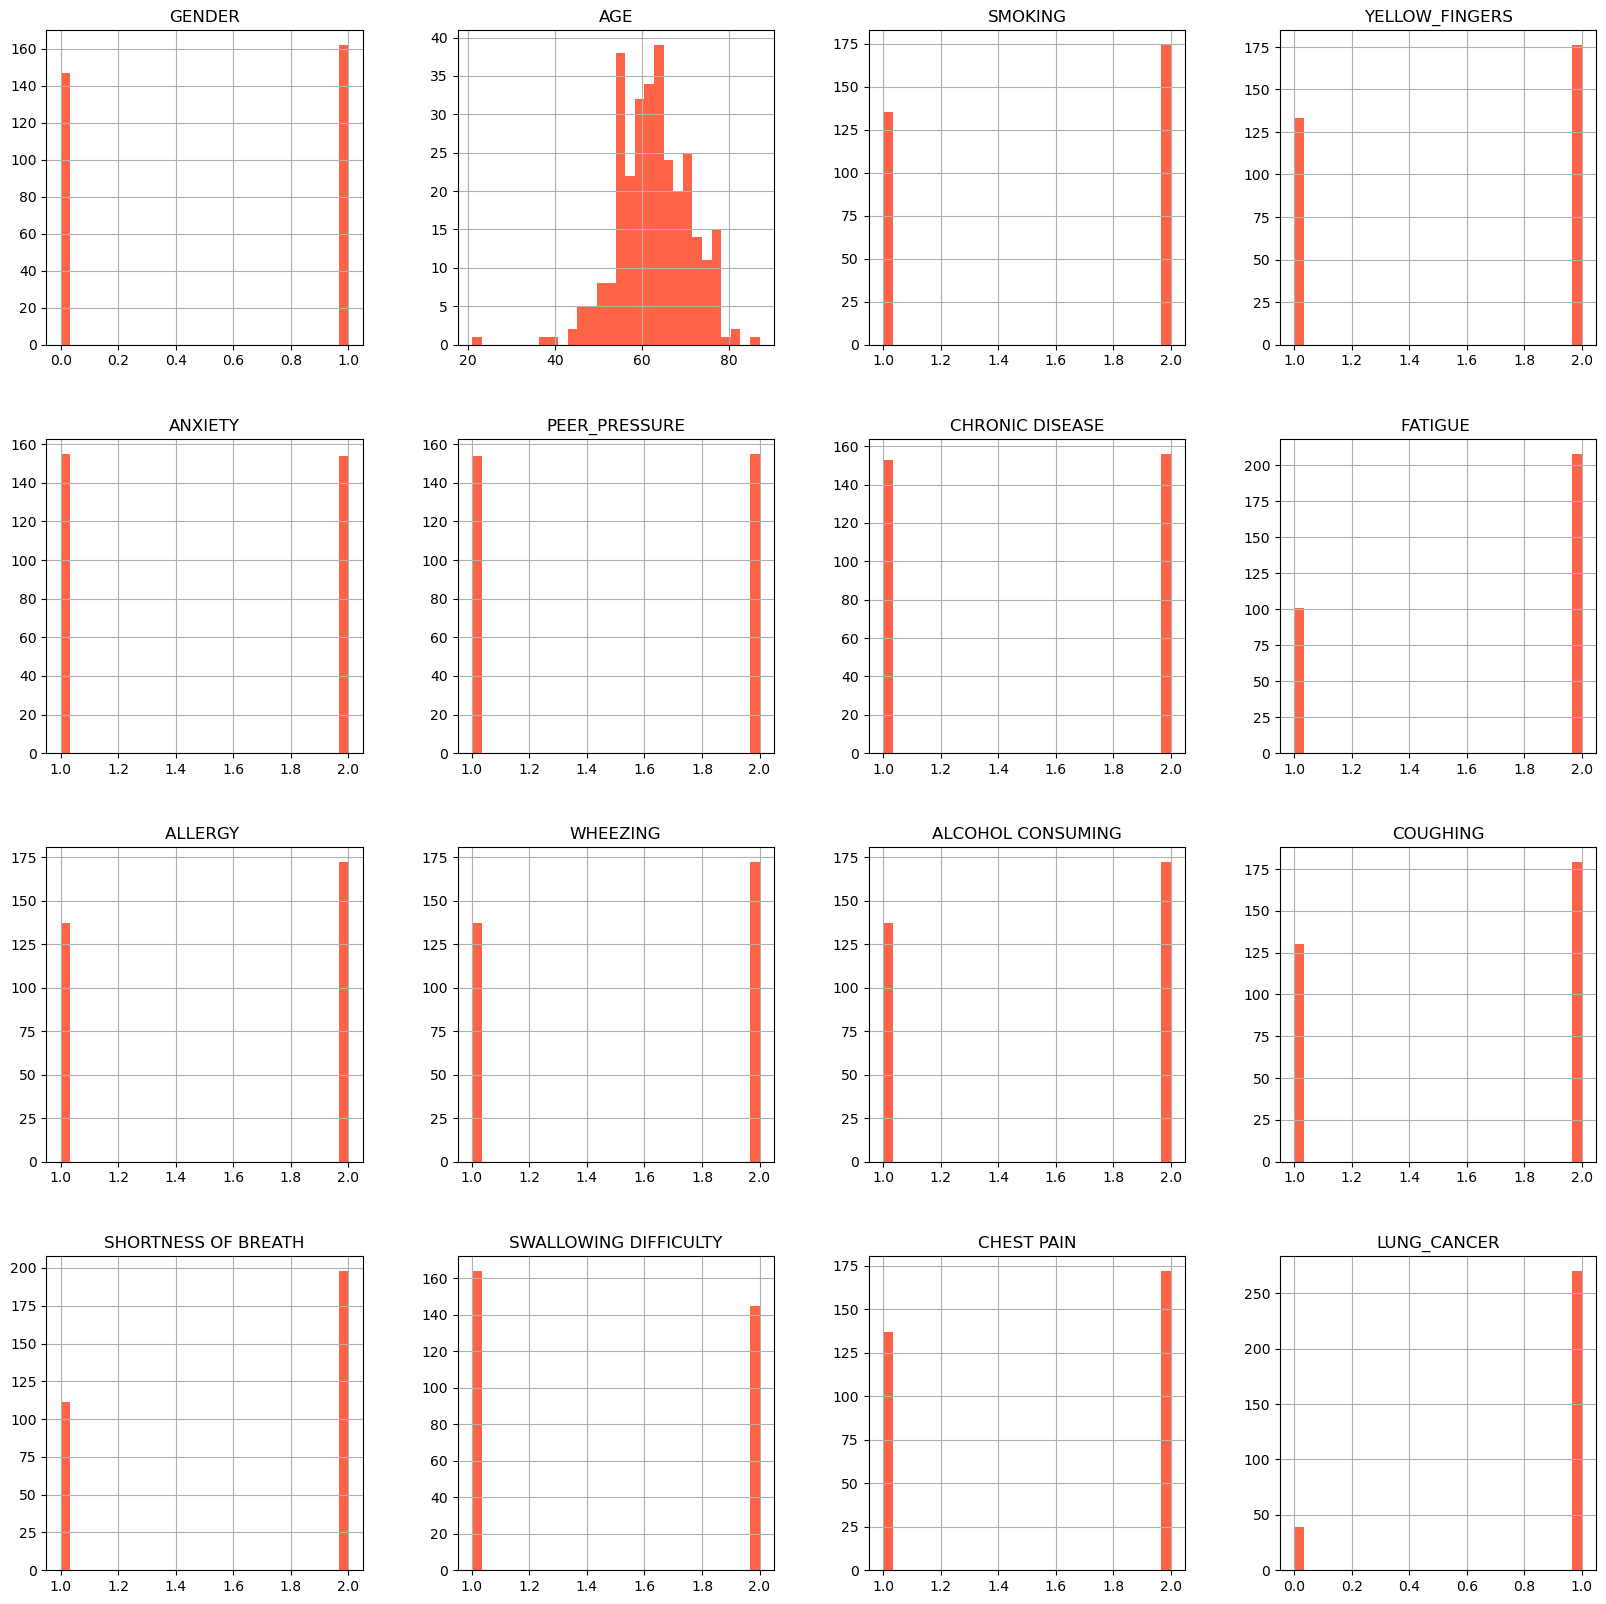

In [31]:
data_cancer.hist(bins = 30, figsize = (20, 20), color = 'tomato')

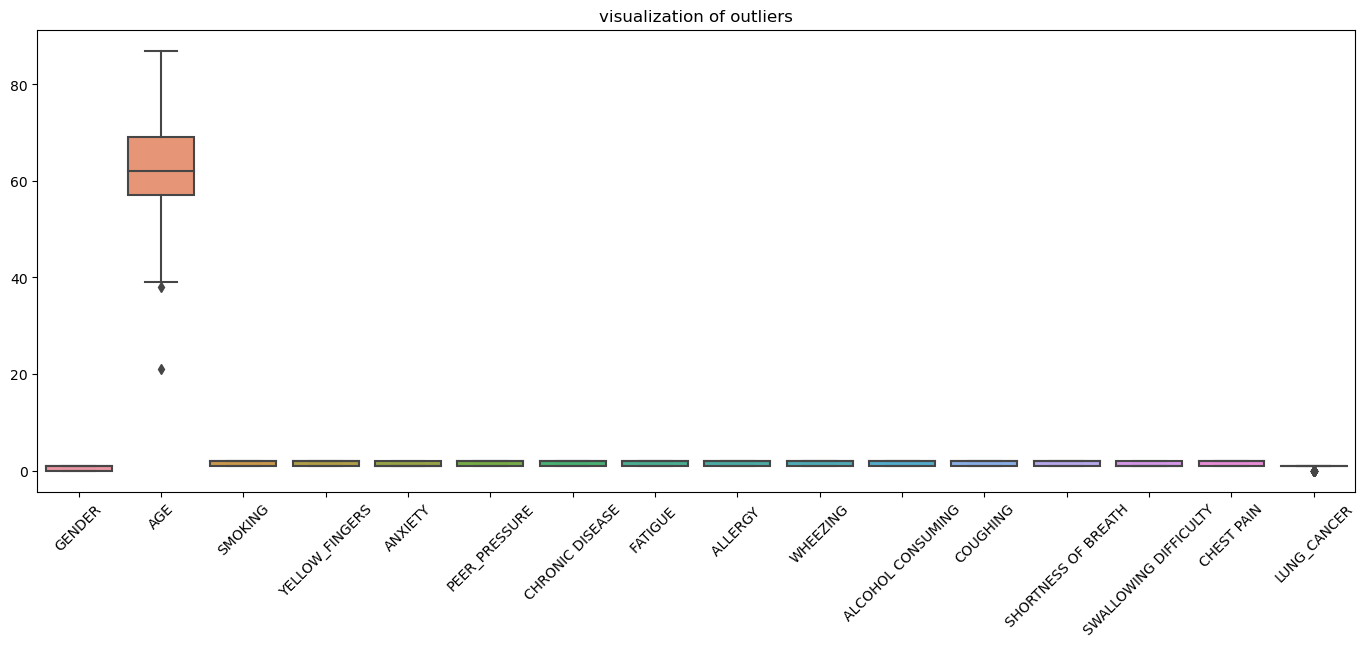

In [32]:
plt.figure(figsize=(17,6))
sns.boxplot(data=data_cancer)
plt.title('visualization of outliers')
plt.xticks(rotation =45)
plt.show()

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

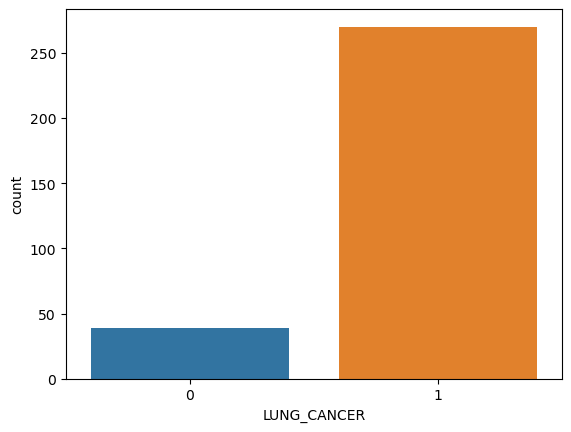

In [33]:
sns.countplot(x = 'LUNG_CANCER', data = data_cancer)

    unbalanced dataset 

## Feature engineering 

In [34]:
data_cancer

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

     LUNG_CANCER  
0              1  
1              1  
2              0  
3              0  
4              0  
..           ...  
304            1  
305            1  
306            1  
307            1  
308            1  

[309 rows x 16 columns]

In [35]:
X = data_cancer.drop('LUNG_CANCER', axis = 1)
y = data_cancer['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((247, 15), (62, 15))

In [36]:
X_train

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
7         0   51        2               2        2              2   
45        1   72        2               2        2              2   
97        1   59        2               1        1              2   
92        1   52        2               1        1              1   
198       0   73        2               2        2              1   
..      ...  ...      ...             ...      ...            ...   
251       0   64        2               2        2              2   
192       0   51        2               2        2              2   
117       0   51        2               2        2              2   
47        0   64        2               2        1              2   
172       1   56        1               2        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
7                  1         2         2         1                  1   
45                 2         2         1         2                  2   
97                 1         1         1         1                  2   
92                 2         2         2         2                  2   
198                2         1         2         1                  2   
..               ...       ...       ...       ...                ...   
251                2         2         2         2                  1   
192                2         1         1         1                  1   
117                1         2         2         1                  1   
47                 1         2         1         2                  2   
172                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
7           1                    2                      2           1  
45          2                    2                      2           2  
97          2                    2                      1           1  
92          1                    1                      2           2  
198         1                    1                      1           1  
..        ...                  ...                    ...         ...  
251         2                    2                      2           2  
192         1                    1                      1           1  
117         1                    2                      2           1  
47          2                    1                      2           2  
172         2                    1                      1           1  

[247 rows x 15 columns]

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[-1.02875329, -1.48758009,  0.88146379, ...,  0.71787006,
         1.06269015, -1.12519112],
       [ 0.97205035,  1.14051184,  0.88146379, ...,  0.71787006,
         1.06269015,  0.88873791],
       [ 0.97205035, -0.48640221,  0.88146379, ...,  0.71787006,
        -0.94100807, -1.12519112],
       ...,
       [-1.02875329, -1.48758009,  0.88146379, ...,  0.71787006,
         1.06269015, -1.12519112],
       [-1.02875329,  0.13933397,  0.88146379, ..., -1.39300976,
         1.06269015,  0.88873791],
       [ 0.97205035, -0.86184391, -1.13447655, ..., -1.39300976,
        -0.94100807, -1.12519112]])

### Model results 

### LogisticRegression Model

In [39]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [40]:
y_pred_train_log = log_reg.predict(X_train)
y_pred_test_log = log_reg.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_log)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_log)))

Training score is 0.9392712550607287.
Testing score is 0.9032258064516129.


<AxesSubplot:>

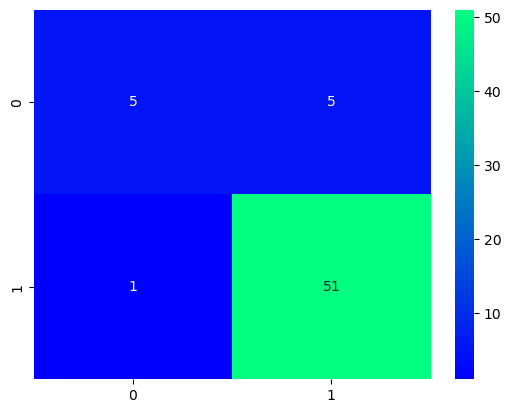

In [41]:
cm = confusion_matrix(y_test, y_pred_test_log)
sns.heatmap(cm, annot = True, cmap = 'winter')

In [42]:
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.91      0.98      0.94        52

    accuracy                           0.90        62
   macro avg       0.87      0.74      0.78        62
weighted avg       0.90      0.90      0.89        62



    LogisticRegression on the training dataset shows 94%, in the test dataset 90%. Precision, recall, f1-score are good predictors of lung cancer. 

### KNeighborsClassifier

In [43]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred_train_knn = knn_classifier.predict(X_train)
y_pred_test_knn = knn_classifier.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_knn)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_knn)))

Training score is 0.9311740890688259.
Testing score is 0.8709677419354839.


              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.89      0.96      0.93        52

    accuracy                           0.87        62
   macro avg       0.78      0.68      0.71        62
weighted avg       0.86      0.87      0.86        62



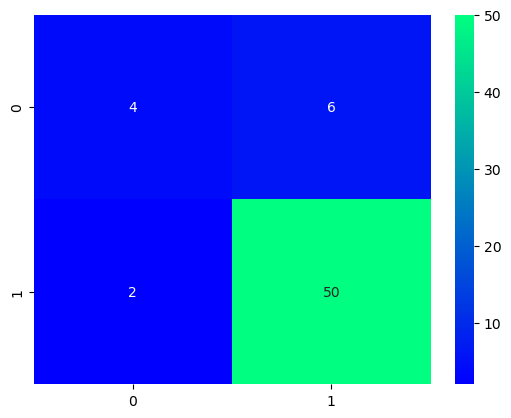

In [45]:
cm = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_knn))

    KNeighborsClassifier shows overfitting and very low results

### SVC

In [46]:
svc_class = SVC()
svc_class.fit(X_train, y_train)


SVC()

Training score is 0.9554655870445344.
Testing score is 0.8870967741935484.


<AxesSubplot:>

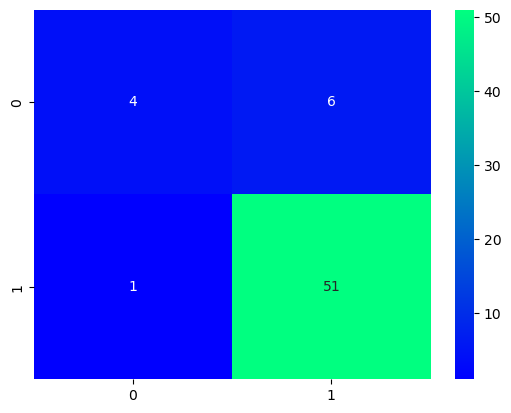

In [47]:
y_pred_train_svc = svc_class.predict(X_train)
y_pred_test_svc = svc_class.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_svc)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_svc)))
cm = confusion_matrix(y_test, y_pred_test_svc)
sns.heatmap(cm, annot = True, cmap = 'winter')

In [48]:
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.89      0.98      0.94        52

    accuracy                           0.89        62
   macro avg       0.85      0.69      0.73        62
weighted avg       0.88      0.89      0.87        62



    SVC is showing poor results as well  

### AdaBoostClassifier

In [49]:
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

Training score is 0.9311740890688259.
Testing score is 0.9193548387096774.
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.91      1.00      0.95        52

    accuracy                           0.92        62
   macro avg       0.96      0.75      0.81        62
weighted avg       0.93      0.92      0.91        62



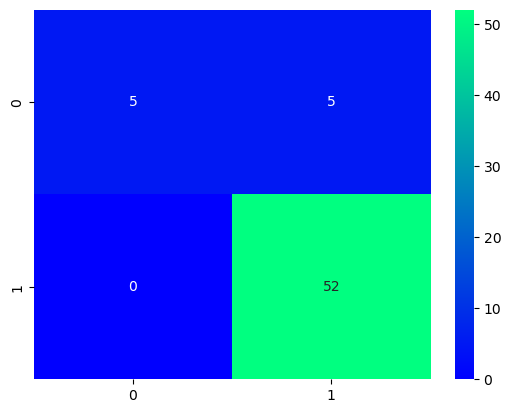

In [50]:
y_pred_train_adaboost = adaboost_classifier.predict(X_train)
y_pred_test_adaboost = adaboost_classifier.predict(X_test)
print('Training score is {}.'.format(accuracy_score(y_train, y_pred_train_adaboost)))
print('Testing score is {}.'.format(accuracy_score(y_test, y_pred_test_adaboost)))
cm = confusion_matrix(y_test, y_pred_test_adaboost)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_adaboost))

    AdaBoostClassifier shows better results.But, f1-score predicts no lung cancer - very poorly.

### DecisionTreeClassifier

In [51]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Training score is 0.9959514170040485.
Testing score is 0.9032258064516129.
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.91      0.98      0.94        52

    accuracy                           0.90        62
   macro avg       0.87      0.74      0.78        62
weighted avg       0.90      0.90      0.89        62



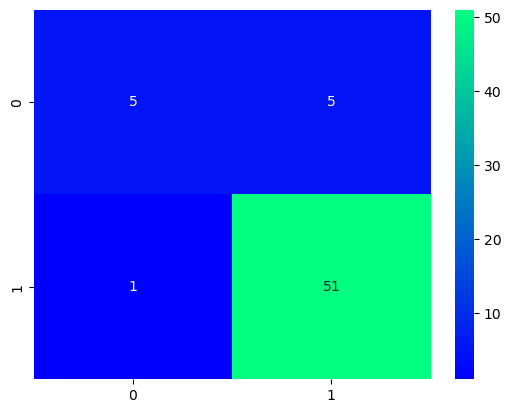

In [52]:
y_pred_train_tree = tree_classifier.predict(X_train)
y_pred_test_tree = tree_classifier.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_tree)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_tree)))
cm = confusion_matrix(y_test, y_pred_test_tree)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_tree))

### RandomForestClassifier

In [53]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

Training score is 0.9959514170040485.
Testing score is 0.9032258064516129.
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.91      0.98      0.94        52

    accuracy                           0.90        62
   macro avg       0.87      0.74      0.78        62
weighted avg       0.90      0.90      0.89        62



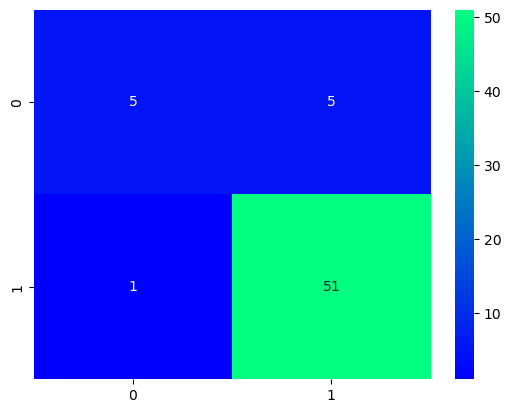

In [54]:
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_rf)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_rf)))
cm = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_rf))

    Decision Tree Classifier, Random Forest Classifier very strong overfitting

### XGBClassifier

In [55]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[15:24:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\KV-DW-JL-5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Training score is 0.9959514170040485.
Testing score is 0.8870967741935484.
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.89      0.98      0.94        52

    accuracy                           0.89        62
   macro avg       0.85      0.69      0.73        62
weighted avg       0.88      0.89      0.87        62



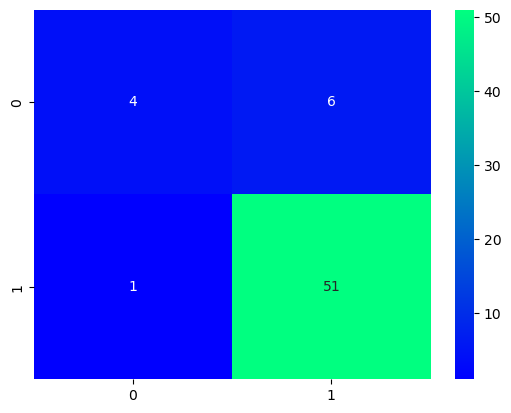

In [56]:
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_xgb)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_xgb)))
cm = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_xgb))

    XGBClassifier training - 99%, in the test 89%. very strong overfitting. Precision, recall, f1-score predict poorly.

### GaussianNB Model

In [57]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

Training score is 0.9149797570850202.
Testing score is 0.8709677419354839.
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.91      0.94      0.92        52

    accuracy                           0.87        62
   macro avg       0.77      0.72      0.74        62
weighted avg       0.86      0.87      0.87        62



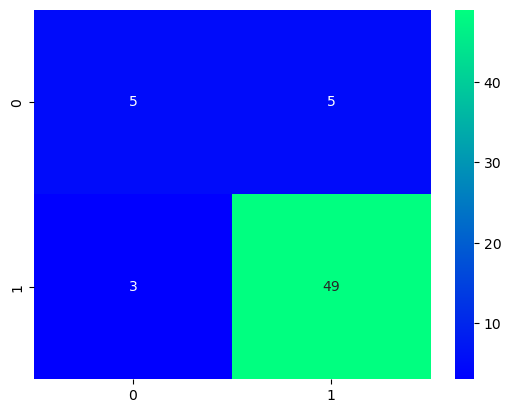

In [58]:
y_pred_train_nb = gaussian.predict(X_train)
y_pred_test_nb = gaussian.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_nb)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_nb)))
cm = confusion_matrix(y_test, y_pred_test_nb)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_nb))

    GaussianNB  - 91% in the training dataset, 87% in the test dataset. In general, not bad, but precision, recall, f1-score poorly predict when there is no cancer.

In [59]:
data_model = pd.DataFrame(data = {'Model': ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'AdaBoostClassifier',
                                            'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier', 'GaussianNB'], 
                                  'Accuracy score': [accuracy_score(y_test, y_pred_test_log),
                                            accuracy_score(y_test, y_pred_test_knn),
                                            accuracy_score(y_test, y_pred_test_svc),
                                            accuracy_score(y_test, y_pred_test_adaboost),
                                            accuracy_score(y_test, y_pred_test_tree),
                                            accuracy_score(y_test, y_pred_test_rf),
                                            accuracy_score(y_test, y_pred_test_xgb),
                                            accuracy_score(y_test, y_pred_test_nb)]}).sort_values(by = 'Accuracy score', ascending = False)

fig = px.bar(data_model, x = 'Model', y='Accuracy score', text = 'Accuracy score', color = 'Model')

fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1100, height=500,
                  margin = dict(t=13, l=13, r=13, b=13))
fig.show()

    In unbalanced dataset AdaBoostClassifier, LogisticRegression show better results. KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, GaussianNB predict weakly and overfit strongly. But all precision, recall , f1-score models show unstable and very low results. 

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

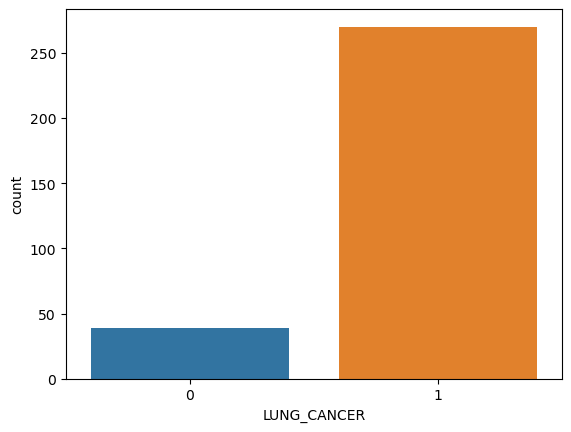

In [60]:
sns.countplot(x = 'LUNG_CANCER', data = data_cancer)

In [61]:
X = data_cancer.drop('LUNG_CANCER', axis = 1)
y = data_cancer['LUNG_CANCER']

## Imblearn.over_sampling - ADASYN

    For data balancing, I chose Adasyn. This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled.

In [62]:
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)


<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

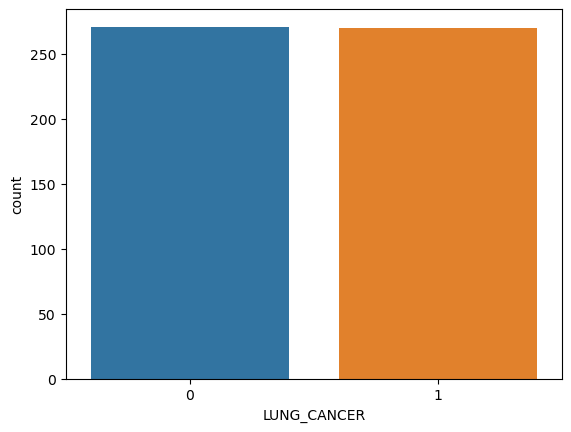

In [63]:
sns.countplot(x = y_adasyn, data = data_cancer)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((432, 15), (109, 15))

In [65]:
X_train

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
473       1   59        1               1        1              1   
340       1   68        1               1        1              1   
205       1   62        1               2        2              2   
446       1   68        1               1        1              2   
471       0   60        1               1        1              1   
..      ...  ...      ...             ...      ...            ...   
70        1   68        2               2        2              2   
277       0   87        1               1        1              1   
9         1   53        2               2        2              2   
359       0   33        2               1        1              1   
192       0   51        2               2        2              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
473                1         1         1         1                  1   
340                1         1         1         1                  2   
205                1         2         1         1                  1   
446                1         1         1         1                  1   
471                1         1         1         1                  1   
..               ...       ...       ...       ...                ...   
70                 1         1         2         1                  2   
277                2         2         1         1                  1   
9                  2         1         2         1                  2   
359                1         2         2         1                  1   
192                2         1         1         1                  1   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
473         1                    1                      1           2  
340         1                    1                      1           1  
205         1                    1                      2           2  
446         1                    1                      1           1  
471         1                    1                      1           1  
..        ...                  ...                    ...         ...  
70          1                    1                      2           2  
277         1                    2                      1           1  
9           1                    1                      2           2  
359         1                    2                      1           1  
192         1                    1                      1           1  

[432 rows x 15 columns]

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_train

array([[ 1.23544154, -0.34042228, -0.8291562 , ..., -1.07203252,
        -0.61302217,  1.29099445],
       [ 1.23544154,  0.7365198 , -0.8291562 , ..., -1.07203252,
        -0.61302217, -0.77459667],
       [ 1.23544154,  0.01855842, -0.8291562 , ..., -1.07203252,
         1.63126238,  1.29099445],
       ...,
       [ 1.23544154, -1.05838366,  1.20604538, ..., -1.07203252,
         1.63126238,  1.29099445],
       [-0.80942721, -3.45158828,  1.20604538, ...,  0.93280752,
        -0.61302217, -0.77459667],
       [-0.80942721, -1.29770412,  1.20604538, ..., -1.07203252,
        -0.61302217, -0.77459667]])

## LogisticRegression

In [68]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Training score is 0.9652777777777778.
Testing score is 0.981651376146789.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.98      0.98      0.98        51

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109



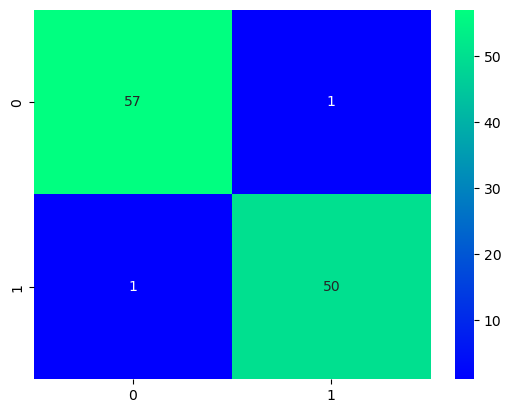

In [69]:
y_pred_train_log = log_reg.predict(X_train)
y_pred_test_log = log_reg.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_log)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_log)))
cm = confusion_matrix(y_test, y_pred_test_log)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_log))

    After balancing the LogisticRegression dataset - in the training dataset it shows 96%, in the test dataset it shows 97%. 

## KNeighborsClassifier


In [70]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred_train_knn = knn_classifier.predict(X_train)
y_pred_test_knn = knn_classifier.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_knn)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_knn)))

Training score is 0.9675925925925926.
Testing score is 0.9541284403669725.


              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.98      0.92      0.95        51

    accuracy                           0.95       109
   macro avg       0.96      0.95      0.95       109
weighted avg       0.96      0.95      0.95       109



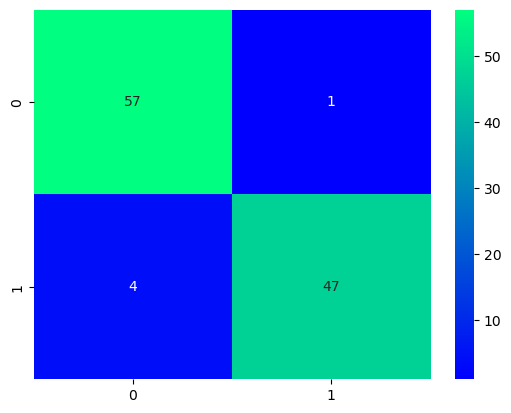

In [72]:
cm = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_knn))

### SVC

In [73]:
svc_class = SVC()
svc_class.fit(X_train, y_train)

SVC()

In [74]:
y_pred_train_svc = svc_class.predict(X_train)
y_pred_test_svc = svc_class.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_svc)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_svc)))

Training score is 0.9745370370370371.
Testing score is 0.944954128440367.


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.96      0.92      0.94        51

    accuracy                           0.94       109
   macro avg       0.95      0.94      0.94       109
weighted avg       0.95      0.94      0.94       109



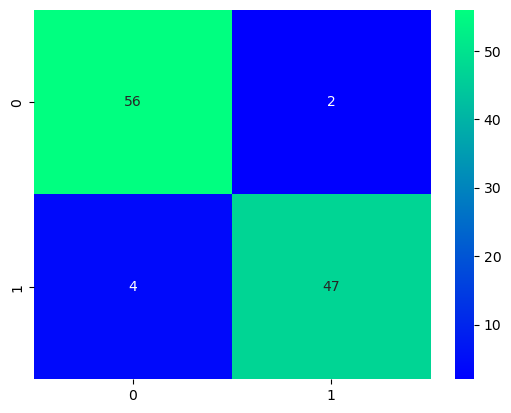

In [75]:
cm = confusion_matrix(y_test, y_pred_test_svc)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_svc))

## AdaBoostClassifier

In [76]:
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

Training score is 0.9722222222222222.
Testing score is 0.981651376146789.
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.98      0.98      0.98        51

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109



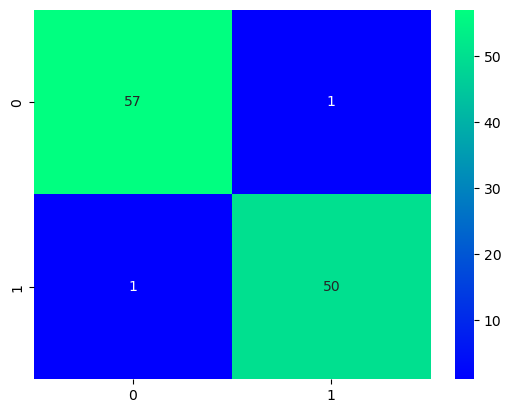

In [77]:
y_pred_train_adaboost = adaboost_classifier.predict(X_train)
y_pred_test_adaboost = adaboost_classifier.predict(X_test)
print('Training score is {}.'.format(accuracy_score(y_train, y_pred_train_adaboost)))
print('Testing score is {}.'.format(accuracy_score(y_test, y_pred_test_adaboost)))
cm = confusion_matrix(y_test, y_pred_test_adaboost)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_adaboost))

 ### DecisionTreeClassifier

In [78]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Training score is 1.0.
Testing score is 0.9174311926605505.
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.94      0.88      0.91        51

    accuracy                           0.92       109
   macro avg       0.92      0.92      0.92       109
weighted avg       0.92      0.92      0.92       109



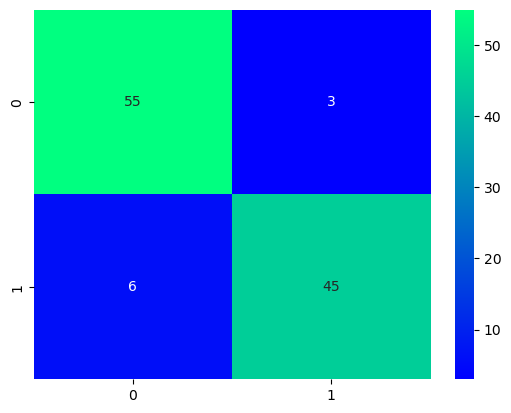

In [79]:
y_pred_train_tree = tree_classifier.predict(X_train)
y_pred_test_tree = tree_classifier.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_tree)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_tree)))
cm = confusion_matrix(y_test, y_pred_test_tree)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_tree))

## RandomForestClassifier

In [80]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

Training score is 1.0.
Testing score is 0.963302752293578.
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.98      0.94      0.96        51

    accuracy                           0.96       109
   macro avg       0.96      0.96      0.96       109
weighted avg       0.96      0.96      0.96       109



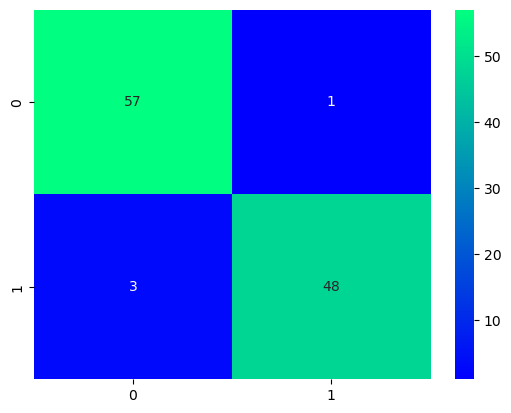

In [81]:
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_rf)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_rf)))
cm = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_rf))

## XGBClassifier

In [82]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[15:24:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\KV-DW-JL-5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Training score is 0.9976851851851852.
Testing score is 0.9541284403669725.
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        58
           1       0.96      0.94      0.95        51

    accuracy                           0.95       109
   macro avg       0.95      0.95      0.95       109
weighted avg       0.95      0.95      0.95       109



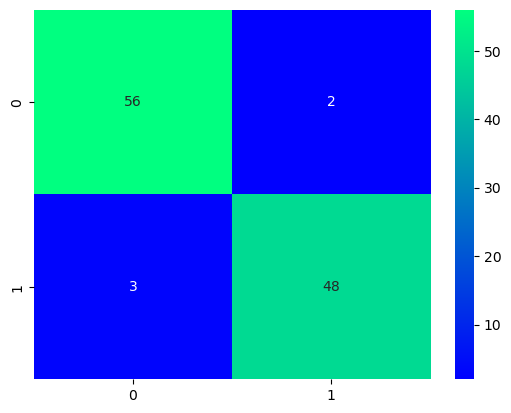

In [83]:
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_xgb)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_xgb)))
cm = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_xgb))

## GaussianNB

In [84]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

Training score is 0.9259259259259259.
Testing score is 0.9174311926605505.
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        58
           1       0.86      0.98      0.92        51

    accuracy                           0.92       109
   macro avg       0.92      0.92      0.92       109
weighted avg       0.93      0.92      0.92       109



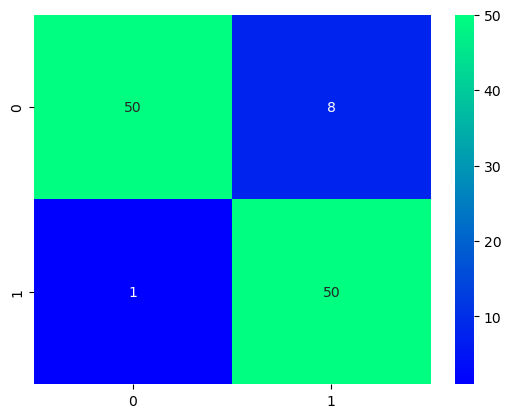

In [85]:
y_pred_train_nb = gaussian.predict(X_train)
y_pred_test_nb = gaussian.predict(X_test)
print("Training score is {}.".format(accuracy_score(y_train, y_pred_train_nb)))
print("Testing score is {}.".format(accuracy_score(y_test, y_pred_test_nb)))
cm = confusion_matrix(y_test, y_pred_test_nb)
sns.heatmap(cm, annot = True, cmap = 'winter')
print(classification_report(y_test, y_pred_test_nb))

In [86]:
data_model = pd.DataFrame(data = {'Model': ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'AdaBoostClassifier',
                                            'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier', 'GaussianNB'], 
                                  'Accuracy score': [accuracy_score(y_test, y_pred_test_log),
                                            accuracy_score(y_test, y_pred_test_knn),
                                            accuracy_score(y_test, y_pred_test_svc),
                                            accuracy_score(y_test, y_pred_test_adaboost),
                                            accuracy_score(y_test, y_pred_test_tree),
                                            accuracy_score(y_test, y_pred_test_rf),
                                            accuracy_score(y_test, y_pred_test_xgb),
                                            accuracy_score(y_test, y_pred_test_nb)]}).sort_values(by = 'Accuracy score', ascending = False)
fig = px.bar(data_model, x = 'Model', y='Accuracy score', text = 'Accuracy score', color = 'Model')

fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1100, height=500,
                  margin = dict(t=13, l=13, r=13, b=13))
fig.show()


    1. SVC, KNeighborsClassifier, shows the best and stable result after dataset balancing. 
    2. LogisticRegression, AdaBoostClassifier, GaussianNB underfitting.
    3. tree-based models RandomForestClassifier, XGBClassifier, DecisionTreeClassifier predict weakly and have overfitting. 

### Conclusion

    
    
    1. This dataset has 309 rows × 16 columns. It is unbalanced Lung cancer patients 87%, non-positive 13%
    2. Lung cancer is almost the same, but more often men. On average, lung cancer occurs between the ages of 56 and 64 years for both men and women, regardless of gender.
    3. People who smoke and drink are more likely to develop lung cancer. 
    4. Lung cancer occurs more often in people who have chronic disease and persistent anxiety, depression, fatigue. 
    5. On unbalanced dataset AdaBoostClassifier, LogisticRegression show the best results. KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, GaussianNB predict weakly and are highly tunable. But precision, recall, f1-score metrics show very low results, below 70% or 1%, which indicates that the model is unstable.  Weakly predict 0 - that the person does not have lung cancer.  As a result, with these scores, it is possible to erroneously diagnose a non-sick person with lung cancer. 
    6.  After balancing the data using Adasyn: SVC, KNeighborsClassifier, shows the best and stable result. Metrics precision, recall, f1-score also predict above 90%, which shows the reliability of the model. LogisticRegression, AdaBoostClassifier, GaussianNB underfitting. Tree-based models RandomForestClassifier, XGBClassifier, DecisionTreeClassifier predict weakly and have overfitting.
    
     
     
     
     
     